In [2]:
import pandas as pd
import natsort as ns
import numpy as np
import nltk
import os
import fakenewsanalyzerptbr as fna
import string
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.util import ngrams
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
path = 'data'
dataset_csv = 'real_and_fake_news_corpus_pt_br.csv'

In [4]:
news = pd.read_csv(os.path.join(path, dataset_csv))

In [5]:
news.name = "ALL NEWS"

In [6]:
news.head(2)

Id                                     news_text_full  \
0  1-FAKE  Kátia Abreu diz que vai colocar sua expulsão e...   
1  1-REAL  O Podemos decidiu  expulsar o deputado federal...   

                                news_text_normalized          author  \
0  Kátia Abreu diz que vai colocar sua expulsão e...             mrk   
1  O Podemos decidiu  expulsar o deputado federal...  Naira Trindade   

                                                link  category  \
0  https://ceticismopolitico.com/2017/11/30/katia...  politica   
1  http://politica.estadao.com.br/blogs/coluna-do...  politica   

  date_of_publication  number_of_tokens  number_of_words_without_punctuation  \
0          2017-11-30               211                                  185   
1          13/12/2017               168                                  148   

   number_of_types  ... number_of_plural_first_personal_pronouns  \
0              120  ...                                        0   
1              107  ...                                        0   

   number_of_pronouns  pausality  number_of_characters  \
0                  26    2.00000                   815   
1                   7    3.33333                   761   

   average_sentence_length  average_word_length  \
0                  14.2308              4.40541   
1                  24.6667              5.14189   

   percentage_of_news_with_speeling_errors  emotiveness  diversity   Tag  
0                                      0.0     0.263158   0.648649  FAKE  
1                                      0.0     0.134328   0.722973  REAL  

[2 rows x 29 columns]

In [7]:
classification = news["Tag"].replace(["FAKE", "REAL"], [0, 1])
news["classification"] = classification

* Were computed a total of 28070876 words from dataset.



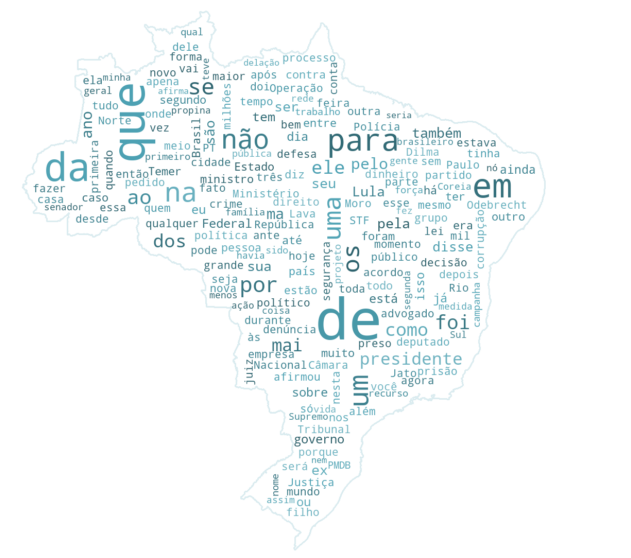

In [8]:
_, all_words, len_all_words = fna.word_cloud_complete(news, "news_text_full", "classification")

* Were computed a total of 4046828 words from dataset.



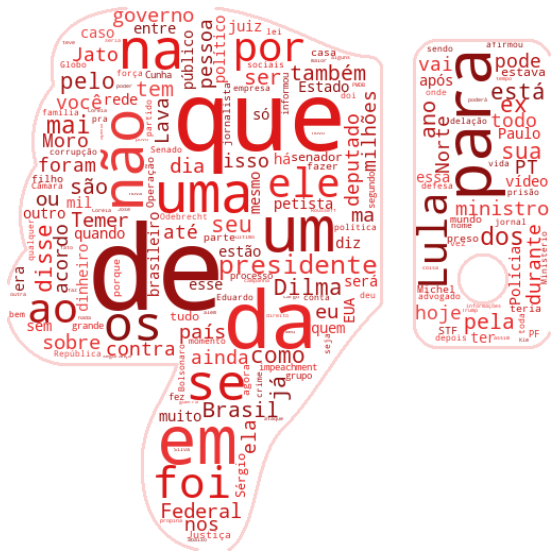

In [9]:
_, fake_words, len_fake_words = fna.word_cloud_fake(news, "news_text_full", "classification")

* Were computed a total of 24024047 words from dataset.



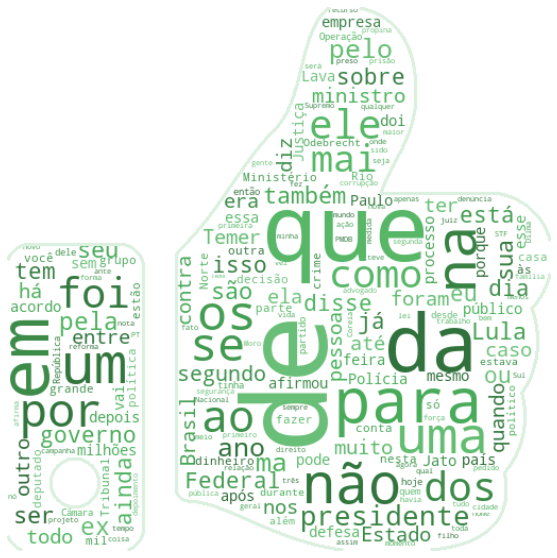

In [10]:
_, real_words, len_real_words = fna.word_cloud_real(news, "news_text_full", "classification")

In [11]:
len(real_words)

24024047

In [12]:
len(news.query('classification == 0'))

3600

In [13]:
news_fake = news.query('classification == 0')
news_real = news.query('classification == 1')
news_fake.head(2)

Id                                     news_text_full  \
0  1-FAKE  Kátia Abreu diz que vai colocar sua expulsão e...   
2  2-FAKE  Blog esquerdista dá a entender que reclamar de...   

                                news_text_normalized author  \
0  Kátia Abreu diz que vai colocar sua expulsão e...    mrk   
2  Blog esquerdista dá a entender que reclamar de...   None   

                                                link             category  \
0  https://ceticismopolitico.com/2017/11/30/katia...             politica   
2  https://ceticismopolitico.com/2017/11/28/blog-...  sociedade_cotidiano   

  date_of_publication  number_of_tokens  number_of_words_without_punctuation  \
0          2017-11-30               211                                  185   
2          2017-11-28               356                                  300   

   number_of_types  ... number_of_pronouns  pausality  number_of_characters  \
0              120  ...                 26    2.00000                   815   
2              187  ...                 30    3.29412                  1321   

   average_sentence_length  average_word_length  \
0                  14.2308              4.40541   
2                  17.6471              4.40333   

   percentage_of_news_with_speeling_errors  emotiveness  diversity   Tag  \
0                                 0.000000     0.263158   0.648649  FAKE   
2                                 0.013333     0.277372   0.623333  FAKE   

   classification  
0               0  
2               0  

[2 rows x 30 columns]

In [14]:
news_real.head(2)

Id                                     news_text_full  \
1  1-REAL  O Podemos decidiu  expulsar o deputado federal...   
3  2-REAL  Em evento realizado nesta terça-feira para div...   

                                news_text_normalized            author  \
1  O Podemos decidiu  expulsar o deputado federal...    Naira Trindade   
3  Em evento realizado nesta terça-feira para div...  Estadão Conteúdo   

                                                link             category  \
1  http://politica.estadao.com.br/blogs/coluna-do...             politica   
3  http://esportes.estadao.com.br/noticias/futebo...  sociedade_cotidiano   

  date_of_publication  number_of_tokens  number_of_words_without_punctuation  \
1          13/12/2017               168                                  148   
3          26/12/2017               349                                  294   

   number_of_types  ... number_of_pronouns  pausality  number_of_characters  \
1              107  ...                  7    3.33333                   761   
3              182  ...                 29    2.75000                  1477   

   average_sentence_length  average_word_length  \
1                  24.6667              5.14189   
3                  14.7000              5.02381   

   percentage_of_news_with_speeling_errors  emotiveness  diversity   Tag  \
1                                      0.0     0.134328   0.722973  REAL   
3                                      0.0     0.325758   0.619048  REAL   

   classification  
1               1  
3               1  

[2 rows x 30 columns]

In [15]:
list(news_fake['news_text_full'].head(1))

['Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar. A senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista. “Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu. Ué, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia? Sabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB. Ou seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos. Em tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação patética para a ex-min

In [16]:
list(news_fake['author'].unique())

['mrk',
 'None',
 'Josias Oliveira',
 'Josias Oliveirs',
 'Folha do Brasil',
 'Josias Olveira']

In [17]:
news_fake.groupby('author').count()

Id  news_text_full  news_text_normalized  link  category  \
author                                                                        
Folha do Brasil     1               1                     1     1         1   
Josias Oliveira    68              68                    68    68        68   
Josias Oliveirs     1               1                     1     1         1   
Josias Olveira      1               1                     1     1         1   
None             3528            3528                  3528  3528      3528   
mrk                 1               1                     1     1         1   

                 date_of_publication  number_of_tokens  \
author                                                   
Folha do Brasil                    1                 1   
Josias Oliveira                   68                68   
Josias Oliveirs                    1                 1   
Josias Olveira                     1                 1   
None                            3528              3528   
mrk                                1                 1   

                 number_of_words_without_punctuation  number_of_types  \
author                                                                  
Folha do Brasil                                    1                1   
Josias Oliveira                                   68               68   
Josias Oliveirs                                    1                1   
Josias Olveira                                     1                1   
None                                            3528             3528   
mrk                                                1                1   

                 number_of_links_inside_the_news  ...  number_of_pronouns  \
author                                            ...                       
Folha do Brasil                                1  ...                   1   
Josias Oliveira                               68  ...                  68   
Josias Oliveirs                                1  ...                   1   
Josias Olveira                                 1  ...                   1   
None                                        3528  ...                3528   
mrk                                            1  ...                   1   

                 pausality  number_of_characters  average_sentence_length  \
author                                                                      
Folha do Brasil          1                     1                        1   
Josias Oliveira         68                    68                       68   
Josias Oliveirs          1                     1                        1   
Josias Olveira           1                     1                        1   
None                  3528                  3528                     3528   
mrk                      1                     1                        1   

                 average_word_length  percentage_of_news_with_speeling_errors  \
author                                                                          
Folha do Brasil                    1                                        1   
Josias Oliveira                   68                                       68   
Josias Oliveirs                    1                                        1   
Josias Olveira                     1                                        1   
None                            3528                                     3528   
mrk                                1                                        1   

                 emotiveness  diversity   Tag  classification  
author                                                         
Folha do Brasil            1          1     1               1  
Josias Oliveira           68         68    68              68  
Josias Oliveirs            1          1     1               1  
Josias Olveira             1          1     1               1  
None                    3528       3528  3528            3528  
mrk  

In [18]:
news_fake[news_fake.author == 'None'].groupby('author').count()

Id  news_text_full  news_text_normalized  link  category  \
author                                                               
None    3528            3528                  3528  3528      3528   

        date_of_publication  number_of_tokens  \
author                                          
None                   3528              3528   

        number_of_words_without_punctuation  number_of_types  \
author                                                         
None                                   3528             3528   

        number_of_links_inside_the_news  ...  number_of_pronouns  pausality  \
author                                   ...                                  
None                               3528  ...                3528       3528   

        number_of_characters  average_sentence_length  average_word_length  \
author                                                                       
None                    3528                     3528                 3528   

        percentage_of_news_with_speeling_errors  emotiveness  diversity   Tag  \
author                                                                          
None                                       3528         3528       3528  3528   

        classification  
author                  
None              3528  

[1 rows x 29 columns]

In [19]:
news_real[news_real.author == 'None'].groupby('author').count()

Id  news_text_full  news_text_normalized  link  category  \
author                                                             
None    47              47                    47    47        47   

        date_of_publication  number_of_tokens  \
author                                          
None                     47                47   

        number_of_words_without_punctuation  number_of_types  \
author                                                         
None                                     47               47   

        number_of_links_inside_the_news  ...  number_of_pronouns  pausality  \
author                                   ...                                  
None                                 47  ...                  47         47   

        number_of_characters  average_sentence_length  average_word_length  \
author                                                                       
None                      47                       47                   47   

        percentage_of_news_with_speeling_errors  emotiveness  diversity  Tag  \
author                                                                         
None                                         47           47         47   47   

        classification  
author                  
None                47  

[1 rows x 29 columns]

In [20]:
news["author_score"] = 1

In [21]:
# Criação da coluna "author_score" sendo 1 para autor existente e 0 para notícias sem autor
news["author_score"] = news["author"].replace(["None"], [0])
news["author_score"] = news["author_score"].where(news["author_score"] == 0, 1)

In [22]:
news.head()

Id                                     news_text_full  \
0  1-FAKE  Kátia Abreu diz que vai colocar sua expulsão e...   
1  1-REAL  O Podemos decidiu  expulsar o deputado federal...   
2  2-FAKE  Blog esquerdista dá a entender que reclamar de...   
3  2-REAL  Em evento realizado nesta terça-feira para div...   
4  3-FAKE  Alckmin diz que por ele PSDB desembarca, mas n...   

                                news_text_normalized            author  \
0  Kátia Abreu diz que vai colocar sua expulsão e...               mrk   
1  O Podemos decidiu  expulsar o deputado federal...    Naira Trindade   
2  Blog esquerdista dá a entender que reclamar de...              None   
3  Em evento realizado nesta terça-feira para div...  Estadão Conteúdo   
4  Alckmin diz que por ele PSDB “desembarca”, mas...              None   

                                                link             category  \
0  https://ceticismopolitico.com/2017/11/30/katia...             politica   
1  http://politica.estadao.com.br/blogs/coluna-do...             politica   
2  https://ceticismopolitico.com/2017/11/28/blog-...  sociedade_cotidiano   
3  http://esportes.estadao.com.br/noticias/futebo...  sociedade_cotidiano   
4  https://ceticismopolitico.com/2017/11/28/alckm...             politica   

  date_of_publication  number_of_tokens  number_of_words_without_punctuation  \
0          2017-11-30               211                                  185   
1          13/12/2017               168                                  148   
2          2017-11-28               356                                  300   
3          26/12/2017               349                                  294   
4          2017-11-28               274                                  224   

   number_of_types  ... pausality  number_of_characters  \
0              120  ...   2.00000                   815   
1              107  ...   3.33333                   761   
2              187  ...   3.29412                  1321   
3              182  ...   2.75000                  1477   
4              150  ...   3.57143                  1075   

   average_sentence_length  average_word_length  \
0                  14.2308              4.40541   
1                  24.6667              5.14189   
2                  17.6471              4.40333   
3                  14.7000              5.02381   
4                  16.0000              4.79911   

   percentage_of_news_with_speeling_errors  emotiveness  diversity   Tag  \
0                                 0.000000     0.263158   0.648649  FAKE   
1                                 0.000000     0.134328   0.722973  REAL   
2                                 0.013333     0.277372   0.623333  FAKE   
3                                 0.000000     0.325758   0.619048  REAL   
4                                 0.000000     0.262136   0.669643  FAKE   

   classification  author_score  
0               0             1  
1               1             1  
2               0             0  
3               1             1  
4               0             0  

[5 rows x 31 columns]

In [23]:
# Contagem de notícias sem autor
news[news.author_score == 0].groupby('classification').count()

Id  news_text_full  news_text_normalized  author  link  \
classification                                                             
0               3528            3528                  3528    3528  3528   
1                 47              47                    47      47    47   

                category  date_of_publication  number_of_tokens  \
classification                                                    
0                   3528                 3528              3528   
1                     47                   47                47   

                number_of_words_without_punctuation  number_of_types  ...  \
classification                                                        ...   
0                                              3528             3528  ...   
1                                                47               47  ...   

                number_of_pronouns  pausality  number_of_characters  \
classification                                                        
0                             3528       3528                  3528   
1                               47         47                    47   

                average_sentence_length  average_word_length  \
classification                                                 
0                                  3528                 3528   
1                                    47                   47   

                percentage_of_news_with_speeling_errors  emotiveness  \
classification                                                         
0                                                  3528         3528   
1                                                    47           47   

                diversity   Tag  author_score  
classification                                 
0                    3528  3528          3528  
1                      47    47            47  

[2 rows x 30 columns]

In [24]:
# Preprocessamento do dataset:

In [25]:
# Unicodes para retirar:
unicodes_to_strip = {
            "\n\n": " ",
            "\n": " ",
            "\ufeff": "",
            "\x85": "",
            "\x91": "",
            "\x92": "",
            "\x93": "",
            "\x94": "",
            "\x96": "",
            "\x97": ""
        }
personalized_simbols = ["“",
                        "”",
                        ",",
                        "”,",
                        '""."',
                        '"),"',
                        '–',
                        'R',
                        '..',
                        '""","',
                        '[...]',
                        ').',
                        '...',
                        '"."""',
                        '),',
                        '".',
                        'aa']
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# Conversão da string de pontuações em lista
punctuation_list = list()
for punct in string.punctuation:
    punctuation_list.append(punct)
# Adicionando strings de pontuação que não estão presentes em string.punctuation (“ e ”)
#punctuation = string.punctuation + '“' + '”'
punctuation_simbols_list = punctuation_list + personalized_simbols
punctuation_simbols_list[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [27]:
# TESTE - Decodificar texto já sem acentos nem unicode
with open('data/full_texts/fake/2.txt', 'r', encoding='utf8') as text:
    teste1 = unidecode.unidecode(text.read())
    for key in unicodes_to_strip:
        teste1 = teste1.replace(key, unicodes_to_strip[key])
    #teste1 = text.read()
teste1[:150]

'Blog esquerdista da a entender que reclamar de dedada no futebol e sinal de homofobia. Um texto de Jorge Gauthier, para o blog Me Salte, do jornal Cor'

In [28]:
with open(os.path.join('data','stopwords_nltk_ordered.txt'), 'r', encoding='utf8') as text:
    #stop_words_extended = unidecode.unidecode(text.read().splitlines())
    stop_words_extended = text.read().splitlines()
stop_words_extended = set(nltk.tokenize.wordpunct_tokenize(unidecode.unidecode(' '.join(stop_words_extended))))

In [29]:
clean_phrases = list()
tokens_traitement_1 = list()
#stop_words_nltk = set(nltk.corpus.stopwords.words('portuguese'))
#stop_words_nltk = set(nltk.tokenize.wordpunct_tokenize(unidecode.unidecode(' '.join(nltk.corpus.stopwords.words('portuguese')))))
#stop_words_nltk = set(nltk.tokenize.wordpunct_tokenize(unidecode.unidecode(' '.join(nltk.corpus.stopwords.words('portuguese')))))
stop_words_nltk = stop_words_extended
for text in news.news_text_full:
    # Decodificar texto sem acentos nem unicode
    news_text = unidecode.unidecode(text)
    for key in unicodes_to_strip:
        # Retira \n e \n\n, principalmente, além dos demais unicodes que possam ter sobrado.
        news_text = news_text.replace(key, unicodes_to_strip[key])
    # Retira stopwords:
    filtered_news = [w for w in nltk.tokenize.wordpunct_tokenize(news_text) if not w in stop_words_nltk]
    # Retira pontuação e deixa todas as palavras em minúsculo:
    filtered_news = [word.lower() for word in filtered_news if not word in (punct for punct in punctuation_simbols_list)]
    filtered_news = [w for w in filtered_news if w.isalpha()]
    filtered_news = [w for w in filtered_news if not w in stop_words_nltk]
    tokens_traitement_1.append(len(filtered_news))
    clean_phrases.append(filtered_news)
# Criar lista com frases tokenizadas e tratadas:
#clean_phrases = [s for s in clean_phrases for w in s if not w in stop_words_nltk]
news['traitement_1'] = clean_phrases
# Criar coluna number_of_tokens_traitement_1
news['number_of_tokens_traitement_1'] = tokens_traitement_1

In [30]:
nltk.tokenize.wordpunct_tokenize("Olá! Eu chamo-me Guilherme.")

['Olá', '!', 'Eu', 'chamo', '-', 'me', 'Guilherme', '.']

In [31]:
news.traitement_1.head()

0    [katia, abreu, diz, vai, colocar, expulsao, mo...
1    [podemos, decidiu, expulsar, deputado, federal...
2    [blog, esquerdista, entender, reclamar, dedada...
3    [evento, realizado, nesta, terca, feira, divul...
4    [alckmin, diz, psdb, desembarca, explica, util...
Name: traitement_1, dtype: object

In [32]:
# Reduzir palavras aos seus radicais: STEM
st = nltk.stem.RSLPStemmer()
stem_traitement_1 = list()
for instance in news.traitement_1:
    stem_phrase = list()
    for word in instance:
        stem_phrase.append(st.stem(word))
    stem_traitement_1.append(stem_phrase)
news['traitement_2'] = stem_traitement_1

In [33]:
news.traitement_2[:2]

0    [kat, abr, diz, vai, coloc, expulsa, mold, rec...
1    [pod, decid, expuls, deput, feder, carl, gagui...
Name: traitement_2, dtype: object

In [34]:
print("Número médio de palavras antes da retirada das stopwords, pontuações e símbolos:\n\n                                                {:.2f} palavras/tokens por notícia\nsendo:\n\n".format(news.number_of_tokens.mean()))
print("Média de palavras das notícias FALSAS:          {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens'][0]))
print("Média de palavras das notícias VERDADEIRAS:     {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens'][1]))#print("Sendo {:.2f} palavras em média para notícias falsas e {:.2f} para verdadeiras.\n\n".format(news.groupby('classification').mean()['number_of_tokens'][0], news.groupby('classification').mean()['number_of_tokens'][1]))
print("Já para o primeiro tratamento, restaram:\n                                                {:.2f} palavras em média por notícia, sendo:\n\n".format(news.number_of_tokens_traitement_1.mean()))
print("Média de palavras das notícias FALSAS:          {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens_traitement_1'][0]))
print("Média de palavras das notícias VERDADEIRAS:     {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens_traitement_1'][1]))

Número médio de palavras antes da retirada das stopwords, pontuações e símbolos:

                                                742.76 palavras/tokens por notícia
sendo:


Média de palavras das notícias FALSAS:          216.24

Média de palavras das notícias VERDADEIRAS:     1269.29

Já para o primeiro tratamento, restaram:
                                                359.78 palavras em média por notícia, sendo:


Média de palavras das notícias FALSAS:          105.92

Média de palavras das notícias VERDADEIRAS:     613.65



In [35]:
news[news.author_score == 0].groupby('classification').count()

Id  news_text_full  news_text_normalized  author  link  \
classification                                                             
0               3528            3528                  3528    3528  3528   
1                 47              47                    47      47    47   

                category  date_of_publication  number_of_tokens  \
classification                                                    
0                   3528                 3528              3528   
1                     47                   47                47   

                number_of_words_without_punctuation  number_of_types  ...  \
classification                                                        ...   
0                                              3528             3528  ...   
1                                                47               47  ...   

                average_sentence_length  average_word_length  \
classification                                                 
0                                  3528                 3528   
1                                    47                   47   

                percentage_of_news_with_speeling_errors  emotiveness  \
classification                                                         
0                                                  3528         3528   
1                                                    47           47   

                diversity   Tag  author_score  traitement_1  \
classification                                                
0                    3528  3528          3528          3528   
1                      47    47            47            47   

                number_of_tokens_traitement_1  traitement_2  
classification                                               
0                                        3528          3528  
1                                          47            47  

[2 rows x 33 columns]

In [36]:
print("NÚMERO DE NOTÍCIAS SEM AUTORIA ASSINADA:\n\n")
print("Falsas:          {}".format(news[news.author_score == 0].groupby('classification').count()['Id'][0]))
print("Verdadeiras:     {}".format(news[news.author_score == 0].groupby('classification').count()['Id'][1]))

NÚMERO DE NOTÍCIAS SEM AUTORIA ASSINADA:


Falsas:          3528
Verdadeiras:     47


In [37]:
# Retirando pontuação e números. Deixando todas as palavras em minúsculo
# isalpha() retirou palavras com hífem, números e simbolos úteis. Não usar!
# teste2 = [w.lower() for w in filtered_news if w.isalpha()]

In [38]:
# Criar dataframes FAKE e REAL:
all_news_words = list()
all_real_news_words = list()
all_fake_news_words = list()
news_fake = news.query('classification == 0')
news_fake.name = 'FAKE NEWS'
news_real = news.query('classification == 1')
news_real.name = 'REAL NEWS'


In [39]:
news_fake['traitement_2'].tail()

7190    [deput, pt, sab, send, film, confess, dilm, us...
7192    [cunh, cancel, viag, ital, porqu, pod, pres, e...
7194    [mulh, beb, invad, planalt, diz, marid, presid...
7196    [ano, nostradamu, prev, vitor, donald, trump, ...
7198    [forc, arm, aparec, pesquis, instituica, confi...
Name: traitement_2, dtype: object

In [40]:
news_fake = news_fake.reset_index()
news_real = news_real.reset_index()

In [41]:
# TRUNCAR NOTÍCIAS
# Medir tamanhos e podar o maior pelo menor
news_fake['traitement_3'] = ''
news_real['traitement_3'] = ''

for row in range(len(news_fake)):
    if len(news_fake.traitement_2[row]) > len(news_real.traitement_2[row]):
        news_fake.traitement_3[row] = news_fake.traitement_2[row][:len(news_real.traitement_2[row])]
        news_real.traitement_3[row] = news_real.traitement_2[row]
    else:
        news_real.traitement_3[row] = news_real.traitement_2[row][:len(news_fake.traitement_2[row])]
        news_fake.traitement_3[row] = news_fake.traitement_2[row]

In [42]:
token_count = []
for news_text in news_fake['traitement_3']:
    token_count.append(len(news_text))

In [43]:
# Unificar dataset:
# token_count
count_fake_real_news = -1
news['traitement_3'] = ''
for row in range(len(news)):
    if row % 2 == 0:
        count_fake_real_news += 1
        news['traitement_3'][row] = news_fake['traitement_3'][count_fake_real_news]
    else:
        news['traitement_3'][row] = news_real['traitement_3'][count_fake_real_news]
    


In [44]:
news_fake.name = 'FAKE NEWS'
news_real.name = 'REAL NEWS'

Word  Frequency Classification
194   presid       3177      FAKE NEWS
381      lul       3088      FAKE NEWS
461   brasil       2591      FAKE NEWS
11      diss       2406      FAKE NEWS
136      pod       2229      FAKE NEWS
...      ...        ...            ...
90     ocorr        337      FAKE NEWS
182    assim        333      FAKE NEWS
256     sant        333      FAKE NEWS
74       hor        332      FAKE NEWS
1559  defend        332      FAKE NEWS

[200 rows x 3 columns]


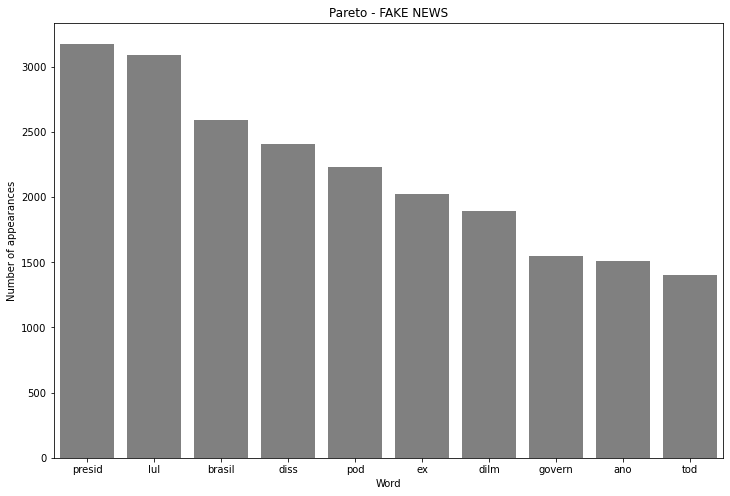

375303

In [45]:
# PARETO
# coluna a ser analisada:
df = news_fake
df_col = 'traitement_3'

fna.pareto_df_tokenized(df, df_col, 10)

Word  Frequency Classification
199   presid       3660      REAL NEWS
88       ano       2692      REAL NEWS
315       ex       2600      REAL NEWS
74      feir       2300      REAL NEWS
4      feder       2168      REAL NEWS
...      ...        ...            ...
71    realiz        340      REAL NEWS
1377   centr        339      REAL NEWS
256      jos        338      REAL NEWS
311       pf        338      REAL NEWS
130   precis        336      REAL NEWS

[200 rows x 3 columns]


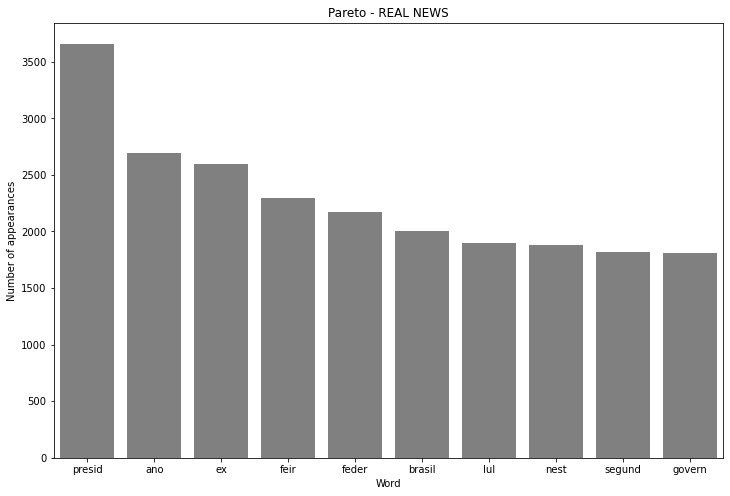

375303

In [46]:

# PARETO
# coluna a ser analisada:
df = news_real
df_col = 'traitement_3'

fna.pareto_df_tokenized(df, df_col, 10)

In [47]:
# Todas as palavras unificadas
col = 'traitement_3'
# for news_text in news[col]:
#     for word in news_text:
#        all_news_words.append(word)
all_fake_news_words = []
all_real_news_words = []
for news_text in news_fake[col]:
    for word in news_text:
       all_fake_news_words.append(word)

for news_text in news_real[col]:
    for word in news_text:       
       all_real_news_words.append(word)

In [48]:
len(all_fake_news_words)

375303

In [49]:
len(all_real_news_words)

375303

In [50]:
bigrams_to_suppress = [
    ('ex', 'presid'),
    ('lav','jat'),
    ('segund','feir'),
    ('terc','feir'),
    ('quart','feir'),
    ('quint','feir'),
    ('sext','feir'),
    ('michel','tem'),
    ('sergi', 'mor'),
    ('dilm', 'rousseff'),
    ('eduard', 'cunh')]

In [51]:
bigrams_fake = list(ngrams(all_fake_news_words, 2))
bigrams2 = []

for bigram in bigrams_fake:
    bigram2 = []
    if not bigram in (bigram for bigram in bigrams_to_suppress):
        for word in bigram:
            bigram2.append(word)
        bigrams2.append(' '.join(bigram2))

bigrams_fake = bigrams2
bigrams_fake[:3]

['kat abr', 'abr diz', 'diz vai']

In [52]:
len(bigrams_fake)

371353

In [53]:
def word_cloud_bigram(bigrams, mask):
    len_bigrams = len(bigrams)
    print("   * Were computed a total of {} bigrams from dataset.\n".format(len_bigrams))
    
    mask_default = "cloud_mask.png"
    #if os.path.join("data", "img", mask)
        
    def color_function(mask):
        if mask == "mapa_brasil_mask.png":
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(190, 40%%, %d%%)" % random.randint(30, 60) #sky
            color_cont = (219, 236, 240)
        elif mask == "thumbs_down_mask_3.png":
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(0, 80%%, %d%%)" % random.randint(30, 60) #fake
            color_cont = (250, 209, 209)
        elif mask == "thumbs_up_mask.png":
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(130, 40%%, %d%%)" % random.randint(30, 60) #real
            color_cont = (219, 240, 223)
        else:
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(0, 0%%, %d%%)" % random.randint(60, 100) #grey
            color_cont = (219, 236, 240)
        return color_func, color_cont

    color_function, color_cont = color_function(mask)

    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform(bigrams)
    vectorizer.vocabulary_
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)

    mask = np.array(Image.open(os.path.join("data", "img", mask)))

    # cloud_of_words = WordCloud(width = 1080,
    #                            height = 1080,
    #                            max_font_size = 110,
    #                            collocations = False,
    #                            mask = mask,
    #                            background_color = "white",
    #                            contour_width = 3,
    #                            contour_color = (219, 236, 240)).generate_from_frequencies(words_dict)
    # cloud_of_words.recolor(color_func=color_func, random_state=3)

    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    cloud_of_words = WordCloud(height=1080,
                               width=1080,
                               max_font_size = 110,
                               collocations = False,
                               background_color = "white",
                               mask = mask,
                               contour_width = 3,
                               contour_color = color_cont)
    cloud_of_words.generate_from_frequencies(words_dict)
    cloud_of_words.recolor(color_func=color_function, random_state=3)
    #plt.title('Most frequently occurring bigrams connected by same colour and font size')
    plt.figure(figsize = (12, 10))
    plt.imshow(cloud_of_words, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    return cloud_of_words, len_bigrams

In [54]:
bigrams_real = list(ngrams(all_real_news_words, 2))
bigrams2 = []

for bigram in bigrams_real:
    bigram2 = []
    if not bigram in (bigram for bigram in bigrams_to_suppress):
        for word in bigram:
            bigram2.append(word)
        bigrams2.append(' '.join(bigram2))

bigrams_real = bigrams2
bigrams_real[:3]

['pod decid', 'decid expuls', 'expuls deput']

* Were computed a total of 371353 bigrams from dataset.



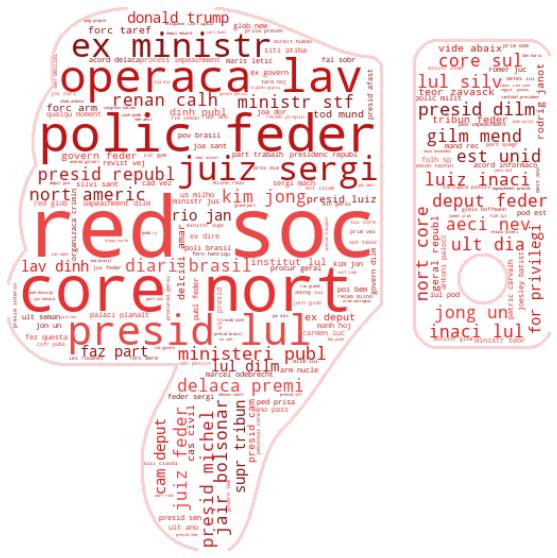

(<wordcloud.wordcloud.WordCloud at 0x7fbdd4422550>, 371353)

In [55]:
word_cloud_bigram(bigrams_fake, "thumbs_down_mask_3.png")

* Were computed a total of 369298 bigrams from dataset.



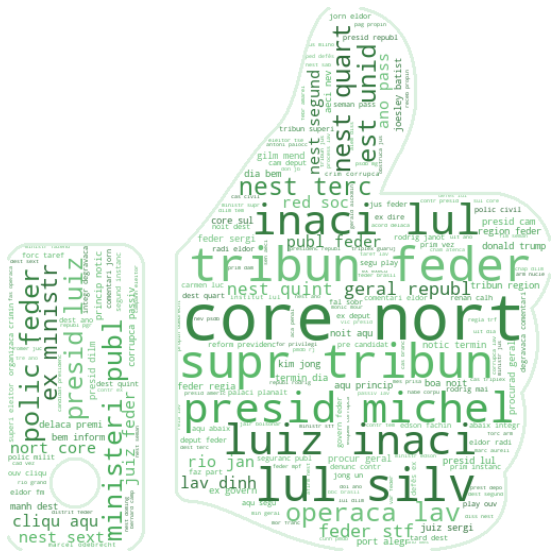

(<wordcloud.wordcloud.WordCloud at 0x7fbd64e429d0>, 369298)

In [56]:
word_cloud_bigram(bigrams_real, "thumbs_up_mask.png")

Word  Frequency Classification
1829          red soc        468           FAKE
38829       core nort        435           FAKE
2000      polic feder        321           FAKE
2325      operaca lav        299           FAKE
2789       presid lul        282           FAKE
...               ...        ...            ...
82348      jos eduard         41           FAKE
2317     denunc contr         40           FAKE
4170       tod brasil         40           FAKE
5841   triplex guaruj         40           FAKE
12223      presid tem         40           FAKE

[200 rows x 3 columns]


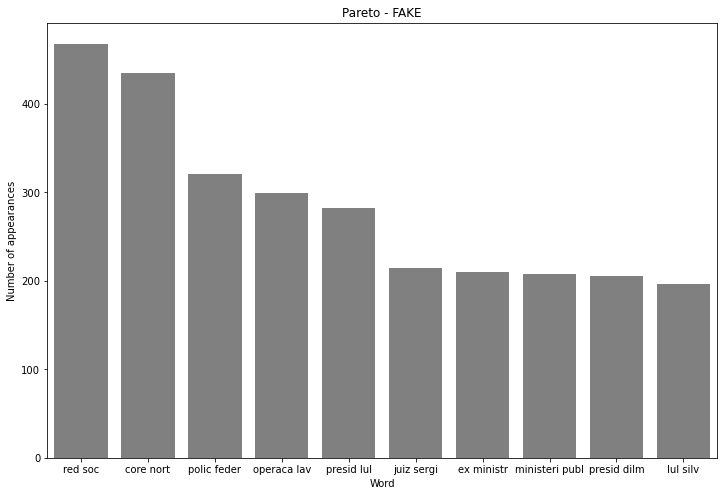

371353

In [57]:
fna.pareto_all_tokenized(bigrams_fake, 'FAKE', 10)

Word  Frequency Classification
37494      core nort        512           REAL
1209    tribun feder        460           REAL
1208     supr tribun        458           REAL
3458        lul silv        438           REAL
1098   presid michel        418           REAL
...              ...        ...            ...
21008    ministr jus         54           REAL
1134       romer juc         53           REAL
7973    feder brasil         53           REAL
11577    cham atenca         53           REAL
13317      taref lav         53           REAL

[200 rows x 3 columns]


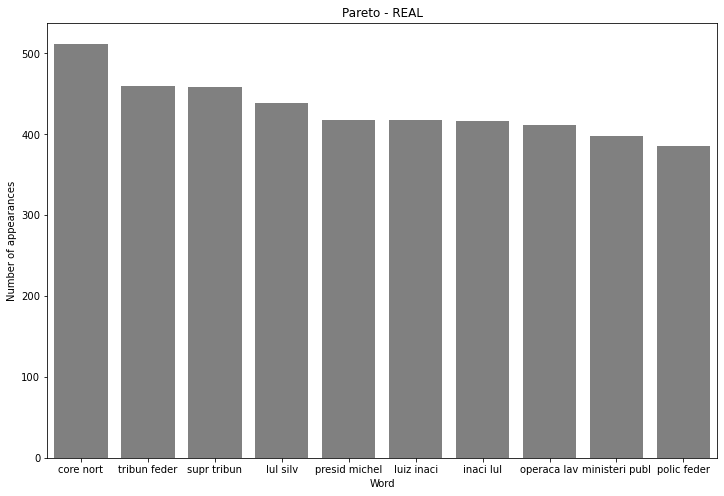

369298

In [58]:
fna.pareto_all_tokenized(bigrams_real, 'REAL', 10)

In [59]:
news.head()

Id                                     news_text_full  \
0  1-FAKE  Kátia Abreu diz que vai colocar sua expulsão e...   
1  1-REAL  O Podemos decidiu  expulsar o deputado federal...   
2  2-FAKE  Blog esquerdista dá a entender que reclamar de...   
3  2-REAL  Em evento realizado nesta terça-feira para div...   
4  3-FAKE  Alckmin diz que por ele PSDB desembarca, mas n...   

                                news_text_normalized            author  \
0  Kátia Abreu diz que vai colocar sua expulsão e...               mrk   
1  O Podemos decidiu  expulsar o deputado federal...    Naira Trindade   
2  Blog esquerdista dá a entender que reclamar de...              None   
3  Em evento realizado nesta terça-feira para div...  Estadão Conteúdo   
4  Alckmin diz que por ele PSDB “desembarca”, mas...              None   

                                                link             category  \
0  https://ceticismopolitico.com/2017/11/30/katia...             politica   
1  http://politica.estadao.com.br/blogs/coluna-do...             politica   
2  https://ceticismopolitico.com/2017/11/28/blog-...  sociedade_cotidiano   
3  http://esportes.estadao.com.br/noticias/futebo...  sociedade_cotidiano   
4  https://ceticismopolitico.com/2017/11/28/alckm...             politica   

  date_of_publication  number_of_tokens  number_of_words_without_punctuation  \
0          2017-11-30               211                                  185   
1          13/12/2017               168                                  148   
2          2017-11-28               356                                  300   
3          26/12/2017               349                                  294   
4          2017-11-28               274                                  224   

   number_of_types  ... percentage_of_news_with_speeling_errors  emotiveness  \
0              120  ...                                0.000000     0.263158   
1              107  ...                                0.000000     0.134328   
2              187  ...                                0.013333     0.277372   
3              182  ...                                0.000000     0.325758   
4              150  ...                                0.000000     0.262136   

   diversity   Tag  classification  author_score  \
0   0.648649  FAKE               0             1   
1   0.722973  REAL               1             1   
2   0.623333  FAKE               0             0   
3   0.619048  REAL               1             1   
4   0.669643  FAKE               0             0   

                                        traitement_1  \
0  [katia, abreu, diz, vai, colocar, expulsao, mo...   
1  [podemos, decidiu, expulsar, deputado, federal...   
2  [blog, esquerdista, entender, reclamar, dedada...   
3  [evento, realizado, nesta, terca, feira, divul...   
4  [alckmin, diz, psdb, desembarca, explica, util...   

   number_of_tokens_traitement_1  \
0                             98   
1                             82   
2                            162   
3                            157   
4                            125   

                                        traitement_2  \
0  [kat, abr, diz, vai, coloc, expulsa, mold, rec...   
1  [pod, decid, expuls, deput, feder, carl, gagui...   
2  [blog, esquerd, entend, reclam, ded, futebol, ...   
3  [event, realiz, nest, terc, feir, divulg, jog,...   
4  [alckmin, diz, psdb, desembarc, explic, utiliz...   

                                        traitement_3  
0  [kat, abr, diz, vai, coloc, expulsa, mold, rec...  
1  [pod, decid, expuls, deput, feder, carl, gagui...  
2  [blog, esquerd, entend, reclam, ded, futebol, ...  
3  [event, realiz, nest, terc, feir, divulg, jog,...  
4  [alckmin, diz, psdb, desembarc, explic, utiliz...  

[5 rows x 35 columns]

In [60]:
processed_phrase = list()
for phrase in news['traitement_3']:
    processed_phrase.append(' '.join(phrase))

news['traitement_4'] = processed_phrase

In [61]:
accuracy_bag_traitement_4 = fna.text_classifier(news, 'traitement_4', 'classification')

============================== START ===============================

LOGISTIC REGRESSION WITH BAG OF WORDS FOR THE 50 MOST FREQUENT WORDS

The bag of words created has 7200 instances with 123 words.

Will be used 5400 instances for training.

Will be used 1800 instances for testing the trained model.

      acord  advog  afirm  aind  algum  ano  apo  apresent  bem  brasil  ...  \
0         0      0      0     0      0    0    0         0    0       0  ...   
1         1      0      0     1      0    0    2         0    0       0  ...   
2         0      0      2     0      1    0    1         0    0       0  ...   
3         0      0      0     1      3    2    0         0    1       0  ...   
4         1      0      0     0      0    0    1         0    0       0  ...   
...     ...    ...    ...   ...    ...  ...  ...       ...  ...     ...  ...   
7195      0      0      0     0      0    0    0         0    0       0  ...   
7196      1      0      0     0      1    1    0        

In [62]:
accuracy_bag_news_text_full = fna.text_classifier(news, 'news_text_full', 'classification')

============================== START ===============================

LOGISTIC REGRESSION WITH BAG OF WORDS FOR THE 50 MOST FREQUENT WORDS

The bag of words created has 7200 instances with 123 words.

Will be used 5400 instances for training.

Will be used 1800 instances for testing the trained model.

      Brasil  Câmara  Dilma  Ele  Em  Eu  Federal  Jato  Justiça  Lava  ...  \
0          0       0      1    0   1   0        0     0        0     0  ...   
1          0       1      0    0   0   0        1     0        0     0  ...   
2          0       0      0    1   0   0        0     0        0     0  ...   
3          0       0      0    0   1   0        0     0        0     0  ...   
4          0       0      1    1   0   1        0     0        0     0  ...   
...      ...     ...    ...  ...  ..  ..      ...   ...      ...   ...  ...   
7195       1       0      0    1   0   0        0     0        0     0  ...   
7196       0       0      0    0   0   0        0     0        0

In [63]:
accuracy_bag_news_text_normalized = fna.text_classifier(news, 'news_text_normalized', 'classification')

============================== START ===============================

LOGISTIC REGRESSION WITH BAG OF WORDS FOR THE 50 MOST FREQUENT WORDS

The bag of words created has 7200 instances with 123 words.

Will be used 5400 instances for training.

Will be used 1800 instances for testing the trained model.

      Brasil  Coreia  Câmara  Dilma  EUA  Ele  Em  Federal  Jato  Justiça  \
0          0       0       0      0    0    0   0        0     0        0   
1          0       0       1      0    0    0   0        1     0        0   
2          0       0       0      0    0    1   0        0     0        0   
3          0       0       0      0    0    0   1        0     0        0   
4          0       0       0      1    0    1   0        0     0        0   
...      ...     ...     ...    ...  ...  ...  ..      ...   ...      ...   
7195       0       0       0      0    0    0   0        0     0        0   
7196       0       0       0      0    0    0   0        0     0        0   
719

In [64]:
# Criação do modelo de regressão logística e de TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
regressao_logistica = LogisticRegression(solver = 'lbfgs')
tfidf = TfidfVectorizer(lowercase = False, max_features = 500)

In [65]:
# Acurácia do TF-IDF para os textos completos sem tratamento:
tfidf_text_full = tfidf.fit_transform(news["news_text_full"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_text_full,
                                                              news["classification"],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia__tfidf_text_full = regressao_logistica.score(teste, classe_teste)
print(acuracia__tfidf_text_full)

#Para visualizar a matriz de frequências:
caracteristicas = tfidf.fit_transform(news["news_text_full"])
pd.DataFrame(
     caracteristicas.todense(),
     columns = tfidf.get_feature_names())

0.9394444444444444


10        11        12   15        20      2014      2015  \
0     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
7195  0.065300  0.037605  0.000000  0.0  0.000000  0.035668  0.000000   
7196  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
7197  0.040882  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
7198  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.176724   
7199  0.000000  0.000000  0.021721  0.0  0.020958  0.045461  0.045820   

          2016      2017  2018  ...      vida  violência      você  volta  \
0     0.000000  0.000000   0.0  ...  0.000000   0.000000  0.000000    0.0   
1     0.000000  0.000000   0.0  ...  0.000000   0.000000  0.000000    0.0   
2     0.000000  0.000000   0.0  ...  0.080155   0.000000  0.081498    0.0   
3     0.000000  0.000000   0.0  ...  0.000000   0.000000  0.157545    0.0   
4     0.000000  0.000000   0.0  ...  0.000000   0.000000  0.000000    0.0   
...        ...       ...   ...  ...       ...        ...       ...    ...   
7195  0.000000  0.000000   0.0  ...  0.000000   0.000000  0.000000    0.0   
7196  0.000000  0.000000   0.0  ...  0.000000   0.000000  0.000000    0.0   
7197  0.000000  0.000000   0.0  ...  0.020171   0.000000  0.000000    0.0   
7198  0.081105  0.000000   0.0  ...  0.000000   0.000000  0.000000    0.0   
7199  0.063086  0.021465   0.0  ...  0.000000   0.027602  0.000000    0.0   

           vão     vídeo        às      área     época    última  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2     0.000000  0.086759  0.000000  0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.100685  0.000000  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...  
7195  0.000000  0.000000  0.027345  0.037665  0.000000  0.035592  
7196  0.000000  0.116808  0.000000  0.000000  0.000000  0.000000  
7197  0.000000  0.000000  0.017119  0.000000  0.000000  0.000000  
7198  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
7199  0.000000  0.000000  0.000000  0.072010  0.091181  0.000000  

[7200 rows x 500 columns]

In [66]:
tfidf_text_normalized = tfidf.fit_transform(news["news_text_normalized"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_text_normalized,
                                                              news["classification"],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_text_normalized = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_text_normalized)

0.8877777777777778


In [67]:
tfidf_traitement_4 = tfidf.fit_transform(news["traitement_4"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_traitement_4,
                                                              news["classification"],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_traitement_4 = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_traitement_4)

0.8611111111111112


In [68]:
tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,3))

vetor_tfidf = tfidf.fit_transform(news["traitement_4"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              news["classification"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams_traitement_4 = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams_traitement_4)

0.8705555555555555


In [69]:
classe_teste

3098    0
2531    1
4071    1
1287    1
2540    0
       ..
4687    1
1979    1
2465    1
6267    1
6877    1
Name: classification, Length: 1800, dtype: int64

In [70]:
#Para visualizar a matriz de frequências:
pd.DataFrame(
     vetor_tfidf.todense(),
     columns = tfidf.get_feature_names())

aa  aa cidad  aa cidad brasil  aa fragil  aa fragil so  aa particip  \
0     0.0       0.0              0.0        0.0           0.0          0.0   
1     0.0       0.0              0.0        0.0           0.0          0.0   
2     0.0       0.0              0.0        0.0           0.0          0.0   
3     0.0       0.0              0.0        0.0           0.0          0.0   
4     0.0       0.0              0.0        0.0           0.0          0.0   
...   ...       ...              ...        ...           ...          ...   
7195  0.0       0.0              0.0        0.0           0.0          0.0   
7196  0.0       0.0              0.0        0.0           0.0          0.0   
7197  0.0       0.0              0.0        0.0           0.0          0.0   
7198  0.0       0.0              0.0        0.0           0.0          0.0   
7199  0.0       0.0              0.0        0.0           0.0          0.0   

      aa particip reunio  aa pesquis  aa pesquis divulg  aabb  ...  \
0                    0.0         0.0                0.0   0.0  ...   
1                    0.0         0.0                0.0   0.0  ...   
2                    0.0         0.0                0.0   0.0  ...   
3                    0.0         0.0                0.0   0.0  ...   
4                    0.0         0.0                0.0   0.0  ...   
...                  ...         ...                ...   ...  ...   
7195                 0.0         0.0                0.0   0.0  ...   
7196                 0.0         0.0                0.0   0.0  ...   
7197                 0.0         0.0                0.0   0.0  ...   
7198                 0.0         0.0                0.0   0.0  ...   
7199                 0.0         0.0                0.0   0.0  ...   

      zwi skornick caix  zwi skornick caminh  zwi skornick elo  \
0                   0.0                  0.0               0.0   
1                   0.0                  0.0               0.0   
2                   0.0                  0.0               0.0   
3                   0.0                  0.0               0.0   
4                   0.0                  0.0               0.0   
...                 ...                  ...               ...   
7195                0.0                  0.0               0.0   
7196                0.0                  0.0               0.0   
7197                0.0                  0.0               0.0   
7198                0.0                  0.0               0.0   
7199                0.0                  0.0               0.0   

      zwi skornick mei  zwi skornick sustent  zygmunt  zygmunt bauman  \
0                  0.0                   0.0      0.0             0.0   
1                  0.0                   0.0      0.0             0.0   
2                  0.0                   0.0      0.0             0.0   
3                  0.0                   0.0      0.0             0.0   
4                  0.0                   0.0      0.0             0.0   
...                ...                   ...      ...             ...   
7195               0.0                   0.0      0.0             0.0   
7196               0.0                   0.0      0.0             0.0   
7197               0.0                   0.0      0.0             0.0   
7198               0.0                   0.0      0.0             0.0   
7199               0.0                   0.0      0.0             0.0   

      zygmunt bauman deput  zygmunt bauman reflet  zygmunt bauman sabed  
0                      0.0                    0.0                   0.0  
1                      0.0                    0.0                   0.0  
2                      0.0                    0.0                   0.0  
3                      0.0                    0.0                   0.0  
4                      0.0                    0.0                   0.0  
...                    ...                    ...                   ...  
7195                   0.0               

In [71]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T, #coef_[0] é o peso de cada item e .T realiza a transposição da matriz
    index = tfidf.get_feature_names()
)

pesos.nlargest(150,0) #mostra os 10 maiores pesos (sentimentos positivos)

0
feir       5.717188
nest       5.339210
segund     3.592580
ano        3.105653
quart      2.649622
...             ...
suspeit    0.709297
pmdb       0.707854
seman      0.707410
condenaca  0.701748
procurad   0.696926

[150 rows x 1 columns]

In [72]:
pesos.nsmallest(150,0) #mostra os 10 menores pesos (sentimentos negativos)

0
dilm    -4.304378
lul     -4.228134
diss    -3.210226
vide    -2.317839
glob    -2.243089
...           ...
etc     -0.672799
can     -0.671435
prova   -0.663551
gener   -0.663217
continu -0.659924

[150 rows x 1 columns]

In [149]:
# predicts1 = pd.DataFrame(regressao_logistica.predict_proba(tfidf.fit_transform(news["traitement_4"])), columns = ['FAKE', 'REAL'])
predicts1 = pd.DataFrame(regressao_logistica.predict_proba(teste), columns = ['FAKE', 'REAL'])
predicts0 = regressao_logistica.predict(teste)

In [74]:
classe_teste

3098    0
2531    1
4071    1
1287    1
2540    0
       ..
4687    1
1979    1
2465    1
6267    1
6877    1
Name: classification, Length: 1800, dtype: int64

In [75]:
predicts1

FAKE      REAL
0     0.552858  0.447142
1     0.458641  0.541359
2     0.384443  0.615557
3     0.551555  0.448445
4     0.625947  0.374053
...        ...       ...
1795  0.459432  0.540568
1796  0.504293  0.495707
1797  0.249652  0.750348
1798  0.269438  0.730562
1799  0.477877  0.522123

[1800 rows x 2 columns]

In [76]:
regressao_logistica.predict_proba(teste)

array([[0.5528577 , 0.4471423 ],
       [0.45864081, 0.54135919],
       [0.38444324, 0.61555676],
       ...,
       [0.24965216, 0.75034784],
       [0.2694383 , 0.7305617 ],
       [0.47787748, 0.52212252]])

In [78]:
index_teste = classe_teste.index

In [79]:
predicts2_list = list()
for row in range(len(predicts1)):
    if news.author_score[index_teste[row]] == 0:
        predicts2_list.append((predicts1['FAKE'][row]*0.8 + 0.2, 1 - (predicts1['FAKE'][row]*0.8 + 0.2)))
    else:
        predicts2_list.append((1 - (predicts1['REAL'][row]*0.8 + 0.2), predicts1['REAL'][row]*0.8 + 0.2))
predicts2 = pd.DataFrame(predicts2_list, columns=['FAKE', 'REAL'])
predicts2.head()


FAKE      REAL
0  0.642286  0.357714
1  0.366913  0.633087
2  0.307555  0.692445
3  0.441244  0.558756
4  0.700758  0.299242

In [80]:
predicts2['predict'] = 0
for row in range(len(predicts2)):
    if predicts2['FAKE'][row] >= predicts2['REAL'][row]:
        predicts2['predict'][row] = 0
    else:
        predicts2['predict'][row] = 1

In [81]:
predicts2.predict.to_numpy()

array([0, 1, 1, ..., 1, 1, 1])

In [82]:
predicts2.predict

0       0
1       1
2       1
3       1
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: predict, Length: 1800, dtype: int64

In [83]:
classe_teste

3098    0
2531    1
4071    1
1287    1
2540    0
       ..
4687    1
1979    1
2465    1
6267    1
6877    1
Name: classification, Length: 1800, dtype: int64

In [84]:
from sklearn.metrics import accuracy_score
acuracia_tfidf_ngrams_mais_registro_autor = accuracy_score(classe_teste, predicts2.predict.to_numpy(), sample_weight=None)
acuracia_tfidf_ngrams_mais_registro_autor

0.9783333333333334

In [113]:
pd.DataFrame(sklearn.metrics.confusion_matrix(classe_teste, predicts2.predict), index=['FAKE Class', 'REAL Class'], columns=['FAKE Prediction', 'REAL Prediction'])

FAKE Prediction  REAL Prediction
FAKE Class              891               20
REAL Class               19              870

In [117]:
from IPython.display import display, HTML
display(HTML(pd.DataFrame(sklearn.metrics.confusion_matrix(classe_teste, predicts2.predict), index=['FAKE Class', 'REAL Class'], columns=['FAKE Prediction', 'REAL Prediction']).to_html()))

In [119]:
print(pd.DataFrame(sklearn.metrics.confusion_matrix(classe_teste, predicts2.predict), index=['FAKE Class', 'REAL Class'], columns=['FAKE Prediction', 'REAL Prediction']).to_markdown())

|            |   FAKE Prediction |   REAL Prediction |
|:-----------|------------------:|------------------:|
| FAKE Class |               891 |                20 |
| REAL Class |                19 |               870 |


In [154]:
dados = [
    ['TF-IDF até 3 ngramas sem autor',
    sklearn.metrics.precision_score(classe_teste, predicts0, average='binary', pos_label = 0),
    sklearn.metrics.precision_score(classe_teste, predicts0, average='binary', pos_label = 1),
    sklearn.metrics.recall_score(classe_teste, predicts0, average='binary', pos_label = 0),
    sklearn.metrics.recall_score(classe_teste, predicts0, average='binary', pos_label = 1),
    sklearn.metrics.f1_score(classe_teste, predicts0, average='binary', pos_label = 0),
    sklearn.metrics.f1_score(classe_teste, predicts0, average='binary', pos_label = 1),
    acuracia_tfidf_ngrams_traitement_4],
    ['TF-IDF até 3 ngramas com autor',
    sklearn.metrics.precision_score(classe_teste, predicts2.predict, average='binary', pos_label = 0),
    sklearn.metrics.precision_score(classe_teste, predicts2.predict, average='binary', pos_label = 1),
    sklearn.metrics.recall_score(classe_teste, predicts2.predict, average='binary', pos_label = 0),
    sklearn.metrics.recall_score(classe_teste, predicts2.predict, average='binary', pos_label = 1),
    sklearn.metrics.f1_score(classe_teste, predicts2.predict, average='binary', pos_label = 0),
    sklearn.metrics.f1_score(classe_teste, predicts2.predict, average='binary', pos_label = 1),
    acuracia_tfidf_ngrams_mais_registro_autor]
]

In [155]:
from tabulate import tabulate
# MATRIZ DE CONFUSÃO:
print("MATRIZ DE CONFUSÃO PARA TF-IDF ATÉ 3 NGRAMAS COM AUTOR:\n\n")
print(tabulate(pd.DataFrame(sklearn.metrics.confusion_matrix(classe_teste, predicts2.predict), index=['FAKE Class', 'REAL Class'], columns=['FAKE Prediction', 'REAL Prediction']), headers='keys', tablefmt='psql'))
# TABELA DE ESTATÍSTICAS:
sklearn.metrics.precision_score(classe_teste, predicts2.predict)
print(tabulate(dados, headers = ['\n\nTécnica', 'Precisão\n(Precision)\nFAKE', 'Precisão\n(Precision)\nREAL', 'Revocação\n(Recall)\nFAKE','Revocação\n(Recall)\nREAL', 'Pontuação F1\n(F-Measure)\nFAKE', 'Pontuação F1\n(F-Measure)\nREAL', 'Acurácia']))
# PRECISION:
# sklearn.metrics.precision_score(classe_teste, predicts2.predict)
# RECALL:
#sklearn.metrics.recall_score(classe_teste, predicts2.predict)
# F-MEASURE:
#sklearn.metrics.f1_score(classe_teste, predicts2.predict)

MATRIZ DE CONFUSÃO PARA TF-IDF ATÉ 3 NGRAMAS COM AUTOR:


+------------+-------------------+-------------------+
|            |   FAKE Prediction |   REAL Prediction |
|------------+-------------------+-------------------|
| FAKE Class |               891 |                20 |
| REAL Class |                19 |               870 |
+------------+-------------------+-------------------+
                                     Precisão       Precisão    Revocação    Revocação    Pontuação F1    Pontuação F1    Acurácia
                                  (Precision)    (Precision)     (Recall)     (Recall)     (F-Measure)     (F-Measure)
Técnica                                  FAKE           REAL         FAKE         REAL            FAKE            REAL
------------------------------  -------------  -------------  -----------  -----------  --------------  --------------  ----------
TF-IDF até 3 ngramas sem autor       0.843813       0.902948     0.913282     0.826772        0.877174        0.

In [159]:
# MATRIZ DE CONFUSÃO SEM AVALIAÇÃO DE AUTORIA:
#index = ['FAKE Class', 'REAL Class']
print(tabulate(pd.DataFrame(sklearn.metrics.confusion_matrix(classe_teste, predicts0), index=['FAKE Class', 'REAL Class'], columns=['FAKE Prediction', 'REAL Prediction']), headers='keys', tablefmt='psql'))

+------------+-------------------+-------------------+
|            |   FAKE Prediction |   REAL Prediction |
|------------+-------------------+-------------------|
| FAKE Class |               832 |                79 |
| REAL Class |               154 |               735 |
+------------+-------------------+-------------------+


In [158]:
# MATRIZ DE CONFUSÃO APÓS AVALIAÇÃO DE AUTORIA:
#index = ['FAKE Class', 'REAL Class']
print(tabulate(pd.DataFrame(sklearn.metrics.confusion_matrix(classe_teste, predicts2.predict), index=['FAKE Class', 'REAL Class'], columns=['FAKE Prediction', 'REAL Prediction']), headers='keys', tablefmt='psql'))

+------------+-------------------+-------------------+
|            |   FAKE Prediction |   REAL Prediction |
|------------+-------------------+-------------------|
| FAKE Class |               891 |                20 |
| REAL Class |                19 |               870 |
+------------+-------------------+-------------------+


In [157]:

# PRECISION:
sklearn.metrics.precision_score(classe_teste, predicts2.predict)
print(tabulate([['TF-IDF até 3 ngrams + autor', sklearn.metrics.precision_score(classe_teste, predicts2.predict), sklearn.metrics.recall_score(classe_teste, predicts2.predict), sklearn.metrics.f1_score(classe_teste, predicts2.predict), ]], headers = ['Técnica', 'Precisão (Precision)', 'Revocação (Recall)', 'Pontuação F1 (F-Measure)']))
# RECALL:
#sklearn.metrics.recall_score(classe_teste, predicts2.predict)
# F-MEASURE:
#sklearn.metrics.f1_score(classe_teste, predicts2.predict)

Técnica                        Precisão (Precision)    Revocação (Recall)    Pontuação F1 (F-Measure)
---------------------------  ----------------------  --------------------  --------------------------
TF-IDF até 3 ngrams + autor                0.977528              0.978628                    0.978078


In [98]:
# MATRIZ DE CONFUSÃO:
sklearn.metrics.confusion_matrix(classe_teste, predicts2.predict)

array([[891,  20],
       [ 19, 870]])

In [99]:
# RECALL:
sklearn.metrics.recall_score(classe_teste, predicts2.predict)

0.9786276715410573

In [100]:
# PRECISION:
sklearn.metrics.precision_score(classe_teste, predicts2.predict)

0.9775280898876404

In [93]:
# F-MEASURE:
sklearn.metrics.f1_score(classe_teste, predicts2.predict)

0.9780775716694772

In [86]:
print('Acurácia para Bag of Words em news_text_full:             {:.2f}%'.format(100*accuracy_bag_news_text_full))
print('Acurácia para Bag of Words emn ews_text_normalized:       {:.2f}%'.format(100*accuracy_bag_news_text_normalized))
print('Acurácia para Bag of Words em traitement_4:               {:.2f}%'.format(100*accuracy_bag_traitement_4))
print("Acurácia para TF-IDF em news_text_full:                   {:.2f}%".format(100*acuracia__tfidf_text_full))
print("Acurácia para TF-IDF em news_text_normalized:             {:.2f}%".format(100*acuracia_tfidf_text_normalized))
print("Acurácia para TF-IDF em traitement_4:                     {:.2f}%".format(100*acuracia_tfidf_traitement_4))
print("Acurácia para TF-IDF com 1, 2 e 3 ngrams em traitement_4: {:.2f}%".format(100*acuracia_tfidf_ngrams_traitement_4))
print("\nAcurácia para TF-IDF com 1, 2 e 3 ngrams em \ntraitement_4 mais avaliação de autor existente ou não:    {:.2f}%".format(100*acuracia_tfidf_ngrams_mais_registro_autor))
print("\n\nProcedimento: com os textos completos, tokenizer, retirar os acentos e números, deixar tudo em minúsculas, retirar stopwords e pontuações, deixar palavras apenas com radical, realizar truncamento dos pares de notícas verdadeiras com falsas para normalizar quantidade de palavras, remontar as notícias em string e criar coluna no dataframe para o resultado deste pre-processamento. Criar coluna do DF com informação da existência ou não de authoria da notícia (0 não e 1 sim). Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras. Usar a função train_test_split do Scikit Learn para dividir o corpus pre-tratado em 75% para treinamento e 25% para testes de precisão (usado random_state = 42). Fazer regressão logística com solver = 'lbfgs'. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array. Com a informação da existência do autor ou não, recalcular a porcentagem com peso de 20% para a existência do autor em favor da notícia ser verdadeira e 20% menos em caso de axência de autor. Verificar qual porcentagem foi maior que 50% para sinalizar 0 à predição FAKE e 1 REAL. Importante observar que a fórmula usada para realizar a correção da porcentagem de predição é dada por peso, sendo 80% de peso para o valor predito pela regressão logística e 20% para o autor existente ou menos 20% para o não existente, premiando a existência do autor e punindo quando não possui, aumentando a distância das estimativas. Por fim, com as porcentagens recalculadas para cada texto de teste, fori usada a função accuracy_score da biblioteca Scikit Learn para calcular a nova acurácia geral do algoritmo.\n É importante observar que este algoritmo dá um passo a mais em direção às técnicas de identificação de notícias falsas criadas pelo professor Gabriel, levando em conta dois de dez passos, os da verificação da fonte. Por este motivo, a proporção de 20%/80% foi escolhido para os cálculos da média ponderada. Ainda, salientamos que nenhuma avaliação da plausabilidade ou veracidade dee fatos específicos foi adicionada, o que certamente poderá causar uma performance inferior ao calculado em um caso de uso real do mesmo. A acurácia de 97,83% é realmente um valor muito superior aos anteriormente obtidos e acreditamos que isto possa ser reflexo da grande quantidade de erros ortográficos nas notícias falsas presentes neste dataset, o que não expõe uma falha do mesmo, mas sim um padrão das fontes de criação de notícias falsas.")

Acurácia para Bag of Words em news_text_full:             95.61%
Acurácia para Bag of Words emn ews_text_normalized:       82.39%
Acurácia para Bag of Words em traitement_4:               80.28%
Acurácia para TF-IDF em news_text_full:                   93.94%
Acurácia para TF-IDF em news_text_normalized:             88.78%
Acurácia para TF-IDF em traitement_4:                     86.11%
Acurácia para TF-IDF com 1, 2 e 3 ngrams em traitement_4: 87.06%

Acurácia para TF-IDF com 1, 2 e 3 ngrams em 
traitement_4 mais avaliação de autor existente ou não:    97.83%


Procedimento: com os textos completos, tokenizer, retirar os acentos e números, deixar tudo em minúsculas, retirar stopwords e pontuações, deixar palavras apenas com radical, realizar truncamento dos pares de notícas verdadeiras com falsas para normalizar quantidade de palavras, remontar as notícias em string e criar coluna no dataframe para o resultado deste pre-processamento. Criar coluna do DF com informação da existência ou 

In [87]:
regressao_logistica.predict(teste)

array([0, 1, 1, ..., 1, 1, 1])

* Were computed a total of 4443394 words from dataset.



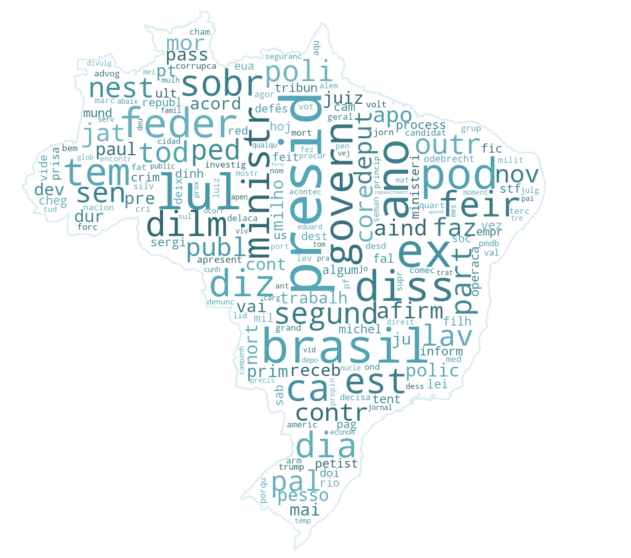

In [88]:
_, all_words, len_all_words = fna.word_cloud_complete(news, "traitement_4", "classification")

* Were computed a total of 2204370 words from dataset.



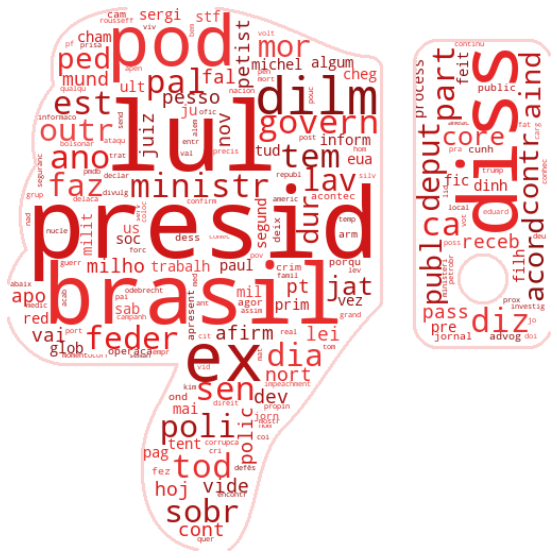

In [89]:
_, fake_words, len_fake_words = fna.word_cloud_fake(news, "traitement_4", "classification")

* Were computed a total of 2239023 words from dataset.



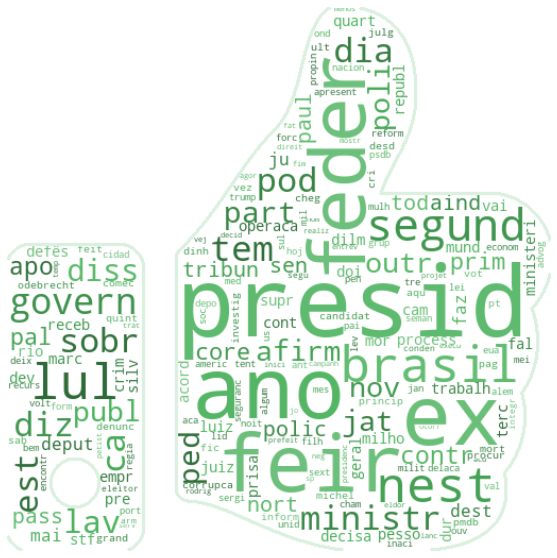

In [90]:
_, real_words, len_real_words = fna.word_cloud_real(news, "traitement_4", "classification")